## Lab 5

Registration No.: 2348542

Name: Purusharth Malik

## Importing the libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

### Loading and Inspection

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#describing the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
#dropping the customerID
df.drop(['customerID'], axis=1, inplace=True)

In [5]:
df.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [6]:
#maintaining data integrity
df.MultipleLines = df.MultipleLines.apply(lambda x: 'No' if x == 'No phone service' else x)

In [7]:
df.MultipleLines.value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

### Handling Missing Values

In [8]:
for _ in df.columns:
    print(f"{_}: {len(df[df[_] == ' '].index)}")

gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 11
Churn: 0


In [9]:
#dropping the rows with missing values
df = df.drop(df[df.TotalCharges == ' '].index, axis=0)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
#splitting the target variables
y = df.Churn
df.drop('Churn', inplace=True, axis=1)

In [11]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

### Encoding the variables

In [12]:
cat_cols=df.dtypes[df.dtypes == object].index.tolist()
for _ in cat_cols:
    print(df[_].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [13]:
#converting TotalCharges to float
df.TotalCharges = df.TotalCharges.astype(float)

In [14]:
#ensuring data integrity in all the internet columns
internet_cols = []
for _ in cat_cols:
    if 'No internet service' in df[_].unique():
        internet_cols.append(_)

In [15]:
#transforming data
for _ in internet_cols:
    df[_] = df[_].apply(lambda x: 'No' if x == 'No internet service' else x)

In [16]:
cat_cols=df.dtypes[df.dtypes == object].index.tolist()
for _ in cat_cols:
    print(df[_].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [17]:
#encoding the variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,True,False,...,True,True,True,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,False,True,True,True,True,True,...,True,False,True,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,True,True,False,True,True,True,...,False,False,False,False,False,False,True,False,False,True


## Logistic Regression Model Building

In [18]:
X = df.values
y = y.apply(lambda x: False if x=='No' else True).values

### Splitting the data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

### Building a baseline logistic regression model

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation and Visualization

### Metrics

In [21]:
y_pred = lr.predict(X_test)

In [22]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8024164889836531

In [23]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.647239263803681

In [24]:
#recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5641711229946524

In [25]:
#f1-score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6028571428571429

In [26]:
#ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7264224443627667

In [27]:
#Cohen's Kappa score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.47217469219433994

In [28]:
#Matthews correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.47414784939687704

### Confusion matrix

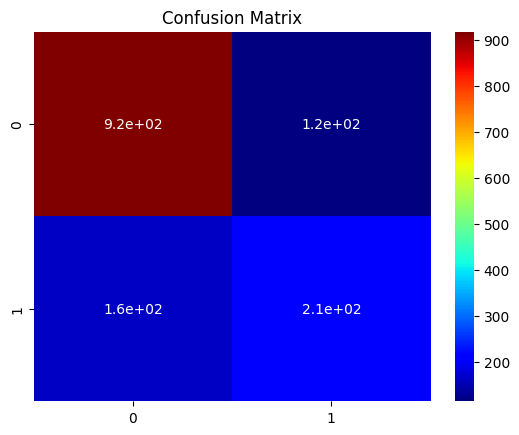

In [29]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='jet', annot=True)
plt.title('Confusion Matrix')
plt.show()

### ROC Curve

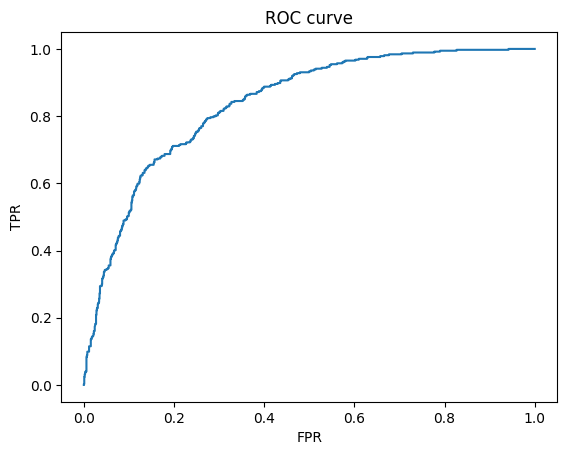

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, lr.predict_proba(X_test)[:, -1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [31]:
#calculating AUC using sklearn
from sklearn.metrics import auc
print(f'AUC calculated by sklearn: {auc(fpr, tpr)}')

AUC calculated by sklearn: 0.8378082113774842


In [32]:
#calculating AUC manually using the trapezoid formula
prev_tpr, prev_fpr, area = 0, 0, 0
for i, j in zip(tpr,fpr):
    area += ((i+prev_tpr)/2)*(j-prev_fpr)
    prev_tpr, prev_fpr = i, j
print(f'AUC calculated manually: {area}')

AUC calculated manually: 0.8378082113774843


### Precision-Recall Curve

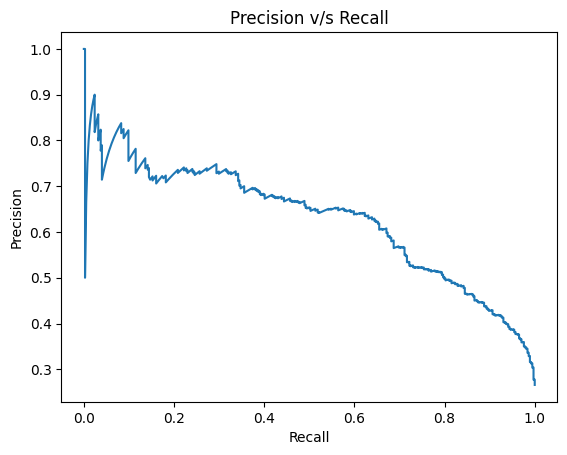

In [33]:
#visualizing the precision-recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, lr.predict_proba(X_test)[:, -1])

plt.plot(recall, precision)
plt.title('Precision v/s Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Log-Loss error

In [61]:
from sklearn.metrics import log_loss

log_loss(y_test, lr.predict_proba(X_test)[:,-1])

0.4252720403383434

### Plotting the sigmoid curve

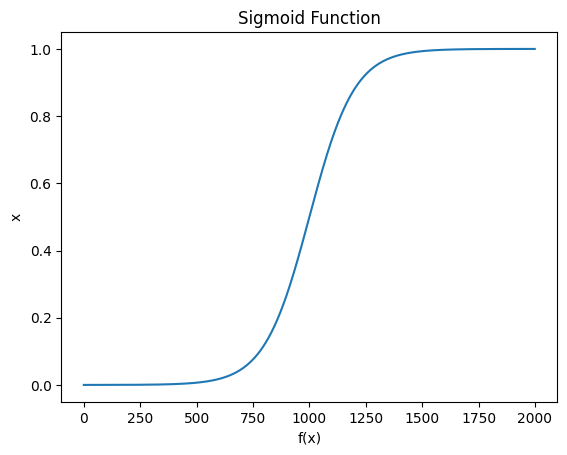

In [35]:
x = np.arange(-10, 10, 0.01)
sigmoid = 1/(1+np.exp(-x))
plt.plot(sigmoid)
plt.title('Sigmoid Function')
plt.xlabel('f(x)')
plt.ylabel('x')
plt.show()

Sigmoid function plays an important role in logistic regression as it addresses three problems:

1. It ensures that the output values i.e. the predicted probabilities will always lie between 0 and 1.

2. It helps capture non-linear patterns between the input features and the target variables.

3. Makes the function differentiable at every point so that we can use gradient descent in order to optimize the training process of the model.

## Hyperparameter Tuning

In [37]:
#using cross-validation in order to find the best parameters
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,42),
      "penalty":["l1","l2"],
     "solver":['lbfgs', 'liblinear', 'saga', 'newton-cg']}
logreg=LogisticRegression(max_iter=200)
logreg_cv=GridSearchCV(logreg, grid, cv=10, verbose=3, scoring='neg_log_loss')
logreg_cv.fit(X_train, y_train)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits
[CV 1/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END .C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=0.001, penalty=l1, solver=liblinear;, score=-0.484 total time=   0.0s
[CV 2/10] END C=0.001, penalty=l1, solv

[CV 9/10] END C=0.0014006881788178693, penalty=l1, solver=liblinear;, score=-0.479 total time=   0.0s
[CV 10/10] END C=0.0014006881788178693, penalty=l1, solver=liblinear;, score=-0.482 total time=   0.0s
[CV 1/10] END C=0.0014006881788178693, penalty=l1, solver=saga;, score=-0.512 total time=   0.3s
[CV 2/10] END C=0.0014006881788178693, penalty=l1, solver=saga;, score=-0.512 total time=   0.3s
[CV 3/10] END C=0.0014006881788178693, penalty=l1, solver=saga;, score=-0.482 total time=   0.3s
[CV 4/10] END C=0.0014006881788178693, penalty=l1, solver=saga;, score=-0.487 total time=   0.3s
[CV 5/10] END C=0.0014006881788178693, penalty=l1, solver=saga;, score=-0.502 total time=   0.3s
[CV 6/10] END C=0.0014006881788178693, penalty=l1, solver=saga;, score=-0.482 total time=   0.3s
[CV 7/10] END C=0.0014006881788178693, penalty=l1, solver=saga;, score=-0.504 total time=   0.3s
[CV 8/10] END C=0.0014006881788178693, penalty=l1, solver=saga;, score=-0.497 total time=   0.3s
[CV 9/10] END C=0.0

[CV 2/10] END C=0.0019619273742801178, penalty=l1, solver=saga;, score=-0.511 total time=   0.3s
[CV 3/10] END C=0.0019619273742801178, penalty=l1, solver=saga;, score=-0.481 total time=   0.3s
[CV 4/10] END C=0.0019619273742801178, penalty=l1, solver=saga;, score=-0.486 total time=   0.4s
[CV 5/10] END C=0.0019619273742801178, penalty=l1, solver=saga;, score=-0.501 total time=   0.3s
[CV 6/10] END C=0.0019619273742801178, penalty=l1, solver=saga;, score=-0.481 total time=   0.3s
[CV 7/10] END C=0.0019619273742801178, penalty=l1, solver=saga;, score=-0.503 total time=   0.3s
[CV 8/10] END C=0.0019619273742801178, penalty=l1, solver=saga;, score=-0.497 total time=   0.4s
[CV 9/10] END C=0.0019619273742801178, penalty=l1, solver=saga;, score=-0.512 total time=   0.3s
[CV 10/10] END C=0.0019619273742801178, penalty=l1, solver=saga;, score=-0.508 total time=   0.3s
[CV 1/10] END C=0.0019619273742801178, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=0.001961927

[CV 5/10] END C=0.0027480484808533427, penalty=l1, solver=saga;, score=-0.501 total time=   0.3s
[CV 6/10] END C=0.0027480484808533427, penalty=l1, solver=saga;, score=-0.480 total time=   0.3s
[CV 7/10] END C=0.0027480484808533427, penalty=l1, solver=saga;, score=-0.503 total time=   0.3s
[CV 8/10] END C=0.0027480484808533427, penalty=l1, solver=saga;, score=-0.496 total time=   0.3s
[CV 9/10] END C=0.0027480484808533427, penalty=l1, solver=saga;, score=-0.512 total time=   0.3s
[CV 10/10] END C=0.0027480484808533427, penalty=l1, solver=saga;, score=-0.508 total time=   0.3s
[CV 1/10] END C=0.0027480484808533427, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=0.0027480484808533427, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=0.0027480484808533427, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=0.0027480484808533427, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=0.002

[CV 8/10] END C=0.0038491590219496812, penalty=l1, solver=saga;, score=-0.496 total time=   0.3s
[CV 9/10] END C=0.0038491590219496812, penalty=l1, solver=saga;, score=-0.511 total time=   0.3s
[CV 10/10] END C=0.0038491590219496812, penalty=l1, solver=saga;, score=-0.507 total time=   0.3s
[CV 1/10] END C=0.0038491590219496812, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=0.0038491590219496812, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=0.0038491590219496812, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=0.0038491590219496812, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=0.0038491590219496812, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=0.0038491590219496812, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=0.0038491590219496812, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C

[CV 3/10] END C=0.005391471540435065, penalty=l2, solver=lbfgs;, score=-0.395 total time=   0.0s
[CV 4/10] END C=0.005391471540435065, penalty=l2, solver=lbfgs;, score=-0.413 total time=   0.0s
[CV 5/10] END C=0.005391471540435065, penalty=l2, solver=lbfgs;, score=-0.433 total time=   0.0s
[CV 6/10] END C=0.005391471540435065, penalty=l2, solver=lbfgs;, score=-0.416 total time=   0.0s
[CV 7/10] END C=0.005391471540435065, penalty=l2, solver=lbfgs;, score=-0.435 total time=   0.0s
[CV 8/10] END C=0.005391471540435065, penalty=l2, solver=lbfgs;, score=-0.456 total time=   0.0s
[CV 9/10] END C=0.005391471540435065, penalty=l2, solver=lbfgs;, score=-0.425 total time=   0.0s
[CV 10/10] END C=0.005391471540435065, penalty=l2, solver=lbfgs;, score=-0.423 total time=   0.0s
[CV 1/10] END C=0.005391471540435065, penalty=l2, solver=liblinear;, score=-0.442 total time=   0.0s
[CV 2/10] END C=0.005391471540435065, penalty=l2, solver=liblinear;, score=-0.433 total time=   0.0s
[CV 3/10] END C=0.005

[CV 7/10] END C=0.007551770453120364, penalty=l2, solver=lbfgs;, score=-0.435 total time=   0.0s
[CV 8/10] END C=0.007551770453120364, penalty=l2, solver=lbfgs;, score=-0.456 total time=   0.0s
[CV 9/10] END C=0.007551770453120364, penalty=l2, solver=lbfgs;, score=-0.425 total time=   0.0s
[CV 10/10] END C=0.007551770453120364, penalty=l2, solver=lbfgs;, score=-0.422 total time=   0.0s
[CV 1/10] END C=0.007551770453120364, penalty=l2, solver=liblinear;, score=-0.439 total time=   0.0s
[CV 2/10] END C=0.007551770453120364, penalty=l2, solver=liblinear;, score=-0.429 total time=   0.0s
[CV 3/10] END C=0.007551770453120364, penalty=l2, solver=liblinear;, score=-0.394 total time=   0.0s
[CV 4/10] END C=0.007551770453120364, penalty=l2, solver=liblinear;, score=-0.409 total time=   0.0s
[CV 5/10] END C=0.007551770453120364, penalty=l2, solver=liblinear;, score=-0.434 total time=   0.0s
[CV 6/10] END C=0.007551770453120364, penalty=l2, solver=liblinear;, score=-0.418 total time=   0.0s
[CV 7

[CV 4/10] END C=0.010577675602831758, penalty=l2, solver=liblinear;, score=-0.407 total time=   0.0s
[CV 5/10] END C=0.010577675602831758, penalty=l2, solver=liblinear;, score=-0.433 total time=   0.0s
[CV 6/10] END C=0.010577675602831758, penalty=l2, solver=liblinear;, score=-0.417 total time=   0.0s
[CV 7/10] END C=0.010577675602831758, penalty=l2, solver=liblinear;, score=-0.434 total time=   0.0s
[CV 8/10] END C=0.010577675602831758, penalty=l2, solver=liblinear;, score=-0.455 total time=   0.0s
[CV 9/10] END C=0.010577675602831758, penalty=l2, solver=liblinear;, score=-0.420 total time=   0.0s
[CV 10/10] END C=0.010577675602831758, penalty=l2, solver=liblinear;, score=-0.414 total time=   0.0s
[CV 1/10] END C=0.010577675602831758, penalty=l2, solver=saga;, score=-0.510 total time=   0.3s
[CV 2/10] END C=0.010577675602831758, penalty=l2, solver=saga;, score=-0.509 total time=   0.2s
[CV 3/10] END C=0.010577675602831758, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 

[CV 10/10] END C=0.014816025176256619, penalty=l2, solver=liblinear;, score=-0.410 total time=   0.0s
[CV 1/10] END C=0.014816025176256619, penalty=l2, solver=saga;, score=-0.510 total time=   0.2s
[CV 2/10] END C=0.014816025176256619, penalty=l2, solver=saga;, score=-0.509 total time=   0.2s
[CV 3/10] END C=0.014816025176256619, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 4/10] END C=0.014816025176256619, penalty=l2, solver=saga;, score=-0.484 total time=   0.2s
[CV 5/10] END C=0.014816025176256619, penalty=l2, solver=saga;, score=-0.499 total time=   0.2s
[CV 6/10] END C=0.014816025176256619, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 7/10] END C=0.014816025176256619, penalty=l2, solver=saga;, score=-0.501 total time=   0.2s
[CV 8/10] END C=0.014816025176256619, penalty=l2, solver=saga;, score=-0.495 total time=   0.2s
[CV 9/10] END C=0.014816025176256619, penalty=l2, solver=saga;, score=-0.510 total time=   0.2s
[CV 10/10] END C=0.014816025176256

[CV 4/10] END C=0.020752631321450575, penalty=l2, solver=saga;, score=-0.484 total time=   0.2s
[CV 5/10] END C=0.020752631321450575, penalty=l2, solver=saga;, score=-0.499 total time=   0.2s
[CV 6/10] END C=0.020752631321450575, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 7/10] END C=0.020752631321450575, penalty=l2, solver=saga;, score=-0.501 total time=   0.2s
[CV 8/10] END C=0.020752631321450575, penalty=l2, solver=saga;, score=-0.495 total time=   0.2s
[CV 9/10] END C=0.020752631321450575, penalty=l2, solver=saga;, score=-0.510 total time=   0.2s
[CV 10/10] END C=0.020752631321450575, penalty=l2, solver=saga;, score=-0.506 total time=   0.2s
[CV 1/10] END C=0.020752631321450575, penalty=l2, solver=newton-cg;, score=-0.433 total time=   0.2s
[CV 2/10] END C=0.020752631321450575, penalty=l2, solver=newton-cg;, score=-0.424 total time=   0.2s
[CV 3/10] END C=0.020752631321450575, penalty=l2, solver=newton-cg;, score=-0.381 total time=   0.2s
[CV 4/10] END C=0.020752

[CV 9/10] END C=0.02906796537132128, penalty=l2, solver=saga;, score=-0.510 total time=   0.2s
[CV 10/10] END C=0.02906796537132128, penalty=l2, solver=saga;, score=-0.506 total time=   0.2s
[CV 1/10] END C=0.02906796537132128, penalty=l2, solver=newton-cg;, score=-0.433 total time=   0.1s
[CV 2/10] END C=0.02906796537132128, penalty=l2, solver=newton-cg;, score=-0.423 total time=   0.1s
[CV 3/10] END C=0.02906796537132128, penalty=l2, solver=newton-cg;, score=-0.379 total time=   0.2s
[CV 4/10] END C=0.02906796537132128, penalty=l2, solver=newton-cg;, score=-0.402 total time=   0.2s
[CV 5/10] END C=0.02906796537132128, penalty=l2, solver=newton-cg;, score=-0.429 total time=   0.2s
[CV 6/10] END C=0.02906796537132128, penalty=l2, solver=newton-cg;, score=-0.415 total time=   0.1s
[CV 7/10] END C=0.02906796537132128, penalty=l2, solver=newton-cg;, score=-0.429 total time=   0.2s
[CV 8/10] END C=0.02906796537132128, penalty=l2, solver=newton-cg;, score=-0.460 total time=   0.2s
[CV 9/10]

[CV 4/10] END C=0.04071515547789688, penalty=l2, solver=newton-cg;, score=-0.400 total time=   0.2s
[CV 5/10] END C=0.04071515547789688, penalty=l2, solver=newton-cg;, score=-0.429 total time=   0.2s
[CV 6/10] END C=0.04071515547789688, penalty=l2, solver=newton-cg;, score=-0.415 total time=   0.2s
[CV 7/10] END C=0.04071515547789688, penalty=l2, solver=newton-cg;, score=-0.428 total time=   0.1s
[CV 8/10] END C=0.04071515547789688, penalty=l2, solver=newton-cg;, score=-0.460 total time=   0.2s
[CV 9/10] END C=0.04071515547789688, penalty=l2, solver=newton-cg;, score=-0.412 total time=   0.1s
[CV 10/10] END C=0.04071515547789688, penalty=l2, solver=newton-cg;, score=-0.401 total time=   0.2s
[CV 1/10] END C=0.057029236976621746, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.057029236976621746, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.057029236976621746, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0

[CV 8/10] END C=0.057029236976621746, penalty=l2, solver=newton-cg;, score=-0.460 total time=   0.2s
[CV 9/10] END C=0.057029236976621746, penalty=l2, solver=newton-cg;, score=-0.411 total time=   0.1s
[CV 10/10] END C=0.057029236976621746, penalty=l2, solver=newton-cg;, score=-0.399 total time=   0.2s
[CV 1/10] END C=0.07988017808015702, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.07988017808015702, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.07988017808015702, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.07988017808015702, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.07988017808015702, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.07988017808015702, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.07988017808015702, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.07988017808015702, penalty=

[CV 4/10] END C=0.11188722115874222, penalty=l1, solver=liblinear;, score=-0.398 total time=   0.0s
[CV 5/10] END C=0.11188722115874222, penalty=l1, solver=liblinear;, score=-0.428 total time=   0.0s
[CV 6/10] END C=0.11188722115874222, penalty=l1, solver=liblinear;, score=-0.416 total time=   0.0s
[CV 7/10] END C=0.11188722115874222, penalty=l1, solver=liblinear;, score=-0.426 total time=   0.0s
[CV 8/10] END C=0.11188722115874222, penalty=l1, solver=liblinear;, score=-0.455 total time=   0.0s
[CV 9/10] END C=0.11188722115874222, penalty=l1, solver=liblinear;, score=-0.413 total time=   0.0s
[CV 10/10] END C=0.11188722115874222, penalty=l1, solver=liblinear;, score=-0.399 total time=   0.0s
[CV 1/10] END C=0.11188722115874222, penalty=l1, solver=saga;, score=-0.510 total time=   0.4s
[CV 2/10] END C=0.11188722115874222, penalty=l1, solver=saga;, score=-0.509 total time=   0.4s
[CV 3/10] END C=0.11188722115874222, penalty=l1, solver=saga;, score=-0.479 total time=   0.3s
[CV 4/10] END 

[CV 9/10] END C=0.15671910803783065, penalty=l1, solver=liblinear;, score=-0.412 total time=   0.0s
[CV 10/10] END C=0.15671910803783065, penalty=l1, solver=liblinear;, score=-0.397 total time=   0.0s
[CV 1/10] END C=0.15671910803783065, penalty=l1, solver=saga;, score=-0.510 total time=   0.4s
[CV 2/10] END C=0.15671910803783065, penalty=l1, solver=saga;, score=-0.509 total time=   0.3s
[CV 3/10] END C=0.15671910803783065, penalty=l1, solver=saga;, score=-0.479 total time=   0.4s
[CV 4/10] END C=0.15671910803783065, penalty=l1, solver=saga;, score=-0.484 total time=   0.3s
[CV 5/10] END C=0.15671910803783065, penalty=l1, solver=saga;, score=-0.499 total time=   0.3s
[CV 6/10] END C=0.15671910803783065, penalty=l1, solver=saga;, score=-0.479 total time=   0.4s
[CV 7/10] END C=0.15671910803783065, penalty=l1, solver=saga;, score=-0.501 total time=   0.3s
[CV 8/10] END C=0.15671910803783065, penalty=l1, solver=saga;, score=-0.495 total time=   0.4s
[CV 9/10] END C=0.15671910803783065, pe

[CV 4/10] END C=0.21951460202346995, penalty=l1, solver=saga;, score=-0.484 total time=   0.3s
[CV 5/10] END C=0.21951460202346995, penalty=l1, solver=saga;, score=-0.499 total time=   0.3s
[CV 6/10] END C=0.21951460202346995, penalty=l1, solver=saga;, score=-0.479 total time=   0.4s
[CV 7/10] END C=0.21951460202346995, penalty=l1, solver=saga;, score=-0.501 total time=   0.4s
[CV 8/10] END C=0.21951460202346995, penalty=l1, solver=saga;, score=-0.495 total time=   0.4s
[CV 9/10] END C=0.21951460202346995, penalty=l1, solver=saga;, score=-0.510 total time=   0.4s
[CV 10/10] END C=0.21951460202346995, penalty=l1, solver=saga;, score=-0.506 total time=   0.4s
[CV 1/10] END C=0.21951460202346995, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=0.21951460202346995, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=0.21951460202346995, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=0.21951460202346995, penalt

[CV 9/10] END C=0.30747150813218355, penalty=l1, solver=saga;, score=-0.510 total time=   0.3s
[CV 10/10] END C=0.30747150813218355, penalty=l1, solver=saga;, score=-0.506 total time=   0.4s
[CV 1/10] END C=0.30747150813218355, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=0.30747150813218355, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=0.30747150813218355, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=0.30747150813218355, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=0.30747150813218355, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=0.30747150813218355, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=0.30747150813218355, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=0.30747150813218355, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=0.307471508132183

[CV 2/10] END C=0.4306717067640514, penalty=l2, solver=lbfgs;, score=-0.422 total time=   0.0s
[CV 3/10] END C=0.4306717067640514, penalty=l2, solver=lbfgs;, score=-0.372 total time=   0.0s
[CV 4/10] END C=0.4306717067640514, penalty=l2, solver=lbfgs;, score=-0.402 total time=   0.0s
[CV 5/10] END C=0.4306717067640514, penalty=l2, solver=lbfgs;, score=-0.434 total time=   0.0s
[CV 6/10] END C=0.4306717067640514, penalty=l2, solver=lbfgs;, score=-0.417 total time=   0.0s
[CV 7/10] END C=0.4306717067640514, penalty=l2, solver=lbfgs;, score=-0.426 total time=   0.0s
[CV 8/10] END C=0.4306717067640514, penalty=l2, solver=lbfgs;, score=-0.461 total time=   0.0s
[CV 9/10] END C=0.4306717067640514, penalty=l2, solver=lbfgs;, score=-0.412 total time=   0.0s
[CV 10/10] END C=0.4306717067640514, penalty=l2, solver=lbfgs;, score=-0.395 total time=   0.0s
[CV 1/10] END C=0.4306717067640514, penalty=l2, solver=liblinear;, score=-0.431 total time=   0.0s
[CV 2/10] END C=0.4306717067640514, penalty=l

[CV 9/10] END C=0.6032367686157227, penalty=l2, solver=lbfgs;, score=-0.411 total time=   0.0s
[CV 10/10] END C=0.6032367686157227, penalty=l2, solver=lbfgs;, score=-0.395 total time=   0.0s
[CV 1/10] END C=0.6032367686157227, penalty=l2, solver=liblinear;, score=-0.431 total time=   0.0s
[CV 2/10] END C=0.6032367686157227, penalty=l2, solver=liblinear;, score=-0.419 total time=   0.0s
[CV 3/10] END C=0.6032367686157227, penalty=l2, solver=liblinear;, score=-0.389 total time=   0.0s
[CV 4/10] END C=0.6032367686157227, penalty=l2, solver=liblinear;, score=-0.407 total time=   0.0s
[CV 5/10] END C=0.6032367686157227, penalty=l2, solver=liblinear;, score=-0.434 total time=   0.0s
[CV 6/10] END C=0.6032367686157227, penalty=l2, solver=liblinear;, score=-0.418 total time=   0.0s
[CV 7/10] END C=0.6032367686157227, penalty=l2, solver=liblinear;, score=-0.426 total time=   0.0s
[CV 8/10] END C=0.6032367686157227, penalty=l2, solver=liblinear;, score=-0.462 total time=   0.0s
[CV 9/10] END C=0

[CV 8/10] END C=0.8449466108283331, penalty=l2, solver=liblinear;, score=-0.462 total time=   0.0s
[CV 9/10] END C=0.8449466108283331, penalty=l2, solver=liblinear;, score=-0.411 total time=   0.0s
[CV 10/10] END C=0.8449466108283331, penalty=l2, solver=liblinear;, score=-0.395 total time=   0.0s
[CV 1/10] END C=0.8449466108283331, penalty=l2, solver=saga;, score=-0.510 total time=   0.2s
[CV 2/10] END C=0.8449466108283331, penalty=l2, solver=saga;, score=-0.509 total time=   0.2s
[CV 3/10] END C=0.8449466108283331, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 4/10] END C=0.8449466108283331, penalty=l2, solver=saga;, score=-0.484 total time=   0.2s
[CV 5/10] END C=0.8449466108283331, penalty=l2, solver=saga;, score=-0.499 total time=   0.2s
[CV 6/10] END C=0.8449466108283331, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 7/10] END C=0.8449466108283331, penalty=l2, solver=saga;, score=-0.501 total time=   0.2s
[CV 8/10] END C=0.8449466108283331, penalty=

[CV 4/10] END C=1.1835067295194677, penalty=l2, solver=saga;, score=-0.484 total time=   0.2s
[CV 5/10] END C=1.1835067295194677, penalty=l2, solver=saga;, score=-0.499 total time=   0.2s
[CV 6/10] END C=1.1835067295194677, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 7/10] END C=1.1835067295194677, penalty=l2, solver=saga;, score=-0.501 total time=   0.2s
[CV 8/10] END C=1.1835067295194677, penalty=l2, solver=saga;, score=-0.495 total time=   0.2s
[CV 9/10] END C=1.1835067295194677, penalty=l2, solver=saga;, score=-0.510 total time=   0.2s
[CV 10/10] END C=1.1835067295194677, penalty=l2, solver=saga;, score=-0.506 total time=   0.2s
[CV 1/10] END C=1.1835067295194677, penalty=l2, solver=newton-cg;, score=-0.433 total time=   0.3s
[CV 2/10] END C=1.1835067295194677, penalty=l2, solver=newton-cg;, score=-0.420 total time=   0.3s
[CV 3/10] END C=1.1835067295194677, penalty=l2, solver=newton-cg;, score=-0.370 total time=   0.3s
[CV 4/10] END C=1.1835067295194677, penalty=

[CV 1/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.433 total time=   0.3s
[CV 2/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.420 total time=   0.3s
[CV 3/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.370 total time=   0.3s
[CV 4/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.396 total time=   0.3s
[CV 5/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.429 total time=   0.3s
[CV 6/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.418 total time=   0.3s
[CV 7/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.426 total time=   0.3s
[CV 8/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.461 total time=   0.3s
[CV 9/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.410 total time=   0.3s
[CV 10/10] END C=1.657723885589316, penalty=l2, solver=newton-cg;, score=-0.394 total time=   0.3s
[CV 1/10] END C=2.3

[CV 7/10] END C=2.3219542502889814, penalty=l2, solver=newton-cg;, score=-0.426 total time=   0.3s
[CV 8/10] END C=2.3219542502889814, penalty=l2, solver=newton-cg;, score=-0.461 total time=   0.3s
[CV 9/10] END C=2.3219542502889814, penalty=l2, solver=newton-cg;, score=-0.410 total time=   0.3s
[CV 10/10] END C=2.3219542502889814, penalty=l2, solver=newton-cg;, score=-0.394 total time=   0.3s
[CV 1/10] END C=3.252333870135681, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=3.252333870135681, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=3.252333870135681, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=3.252333870135681, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=3.252333870135681, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=3.252333870135681, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=3.252333870135681, penalty=l1, solver=lbf

[CV 2/10] END C=4.55550560546802, penalty=l1, solver=liblinear;, score=-0.420 total time=   0.2s
[CV 3/10] END C=4.55550560546802, penalty=l1, solver=liblinear;, score=-0.370 total time=   0.0s
[CV 4/10] END C=4.55550560546802, penalty=l1, solver=liblinear;, score=-0.397 total time=   0.0s
[CV 5/10] END C=4.55550560546802, penalty=l1, solver=liblinear;, score=-0.429 total time=   0.0s
[CV 6/10] END C=4.55550560546802, penalty=l1, solver=liblinear;, score=-0.417 total time=   0.0s
[CV 7/10] END C=4.55550560546802, penalty=l1, solver=liblinear;, score=-0.426 total time=   0.0s
[CV 8/10] END C=4.55550560546802, penalty=l1, solver=liblinear;, score=-0.462 total time=   0.0s
[CV 9/10] END C=4.55550560546802, penalty=l1, solver=liblinear;, score=-0.410 total time=   0.0s
[CV 10/10] END C=4.55550560546802, penalty=l1, solver=liblinear;, score=-0.394 total time=   0.0s
[CV 1/10] END C=4.55550560546802, penalty=l1, solver=saga;, score=-0.510 total time=   0.4s
[CV 2/10] END C=4.55550560546802, 

[CV 9/10] END C=6.380842850117597, penalty=l1, solver=liblinear;, score=-0.410 total time=   0.0s
[CV 10/10] END C=6.380842850117597, penalty=l1, solver=liblinear;, score=-0.394 total time=   0.0s
[CV 1/10] END C=6.380842850117597, penalty=l1, solver=saga;, score=-0.510 total time=   0.4s
[CV 2/10] END C=6.380842850117597, penalty=l1, solver=saga;, score=-0.509 total time=   0.4s
[CV 3/10] END C=6.380842850117597, penalty=l1, solver=saga;, score=-0.479 total time=   0.4s
[CV 4/10] END C=6.380842850117597, penalty=l1, solver=saga;, score=-0.484 total time=   0.4s
[CV 5/10] END C=6.380842850117597, penalty=l1, solver=saga;, score=-0.499 total time=   0.4s
[CV 6/10] END C=6.380842850117597, penalty=l1, solver=saga;, score=-0.479 total time=   0.4s
[CV 7/10] END C=6.380842850117597, penalty=l1, solver=saga;, score=-0.501 total time=   0.4s
[CV 8/10] END C=6.380842850117597, penalty=l1, solver=saga;, score=-0.495 total time=   0.4s
[CV 9/10] END C=6.380842850117597, penalty=l1, solver=saga;

[CV 6/10] END C=8.93757115105424, penalty=l1, solver=saga;, score=-0.479 total time=   0.4s
[CV 7/10] END C=8.93757115105424, penalty=l1, solver=saga;, score=-0.501 total time=   0.4s
[CV 8/10] END C=8.93757115105424, penalty=l1, solver=saga;, score=-0.495 total time=   0.4s
[CV 9/10] END C=8.93757115105424, penalty=l1, solver=saga;, score=-0.510 total time=   0.4s
[CV 10/10] END C=8.93757115105424, penalty=l1, solver=saga;, score=-0.506 total time=   0.4s
[CV 1/10] END C=8.93757115105424, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=8.93757115105424, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=8.93757115105424, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=8.93757115105424, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=8.93757115105424, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=8.93757115105424, penalty=l1, solver=newton-cg;, scor

[CV 2/10] END C=12.518750258625293, penalty=l2, solver=lbfgs;, score=-0.420 total time=   0.0s
[CV 3/10] END C=12.518750258625293, penalty=l2, solver=lbfgs;, score=-0.374 total time=   0.0s
[CV 4/10] END C=12.518750258625293, penalty=l2, solver=lbfgs;, score=-0.398 total time=   0.0s
[CV 5/10] END C=12.518750258625293, penalty=l2, solver=lbfgs;, score=-0.430 total time=   0.0s
[CV 6/10] END C=12.518750258625293, penalty=l2, solver=lbfgs;, score=-0.420 total time=   0.0s
[CV 7/10] END C=12.518750258625293, penalty=l2, solver=lbfgs;, score=-0.428 total time=   0.0s
[CV 8/10] END C=12.518750258625293, penalty=l2, solver=lbfgs;, score=-0.462 total time=   0.0s
[CV 9/10] END C=12.518750258625293, penalty=l2, solver=lbfgs;, score=-0.411 total time=   0.0s
[CV 10/10] END C=12.518750258625293, penalty=l2, solver=lbfgs;, score=-0.393 total time=   0.0s
[CV 1/10] END C=12.518750258625293, penalty=l2, solver=liblinear;, score=-0.431 total time=   0.0s
[CV 2/10] END C=12.518750258625293, penalty=l

[CV 9/10] END C=17.534865500829557, penalty=l2, solver=lbfgs;, score=-0.411 total time=   0.0s
[CV 10/10] END C=17.534865500829557, penalty=l2, solver=lbfgs;, score=-0.393 total time=   0.0s
[CV 1/10] END C=17.534865500829557, penalty=l2, solver=liblinear;, score=-0.431 total time=   0.0s
[CV 2/10] END C=17.534865500829557, penalty=l2, solver=liblinear;, score=-0.419 total time=   0.0s
[CV 3/10] END C=17.534865500829557, penalty=l2, solver=liblinear;, score=-0.389 total time=   0.0s
[CV 4/10] END C=17.534865500829557, penalty=l2, solver=liblinear;, score=-0.407 total time=   0.0s
[CV 5/10] END C=17.534865500829557, penalty=l2, solver=liblinear;, score=-0.434 total time=   0.0s
[CV 6/10] END C=17.534865500829557, penalty=l2, solver=liblinear;, score=-0.418 total time=   0.0s
[CV 7/10] END C=17.534865500829557, penalty=l2, solver=liblinear;, score=-0.425 total time=   0.0s
[CV 8/10] END C=17.534865500829557, penalty=l2, solver=liblinear;, score=-0.462 total time=   0.0s
[CV 9/10] END C=1

[CV 7/10] END C=24.56087882417324, penalty=l2, solver=liblinear;, score=-0.425 total time=   0.0s
[CV 8/10] END C=24.56087882417324, penalty=l2, solver=liblinear;, score=-0.462 total time=   0.0s
[CV 9/10] END C=24.56087882417324, penalty=l2, solver=liblinear;, score=-0.411 total time=   0.0s
[CV 10/10] END C=24.56087882417324, penalty=l2, solver=liblinear;, score=-0.394 total time=   0.0s
[CV 1/10] END C=24.56087882417324, penalty=l2, solver=saga;, score=-0.510 total time=   0.3s
[CV 2/10] END C=24.56087882417324, penalty=l2, solver=saga;, score=-0.509 total time=   0.2s
[CV 3/10] END C=24.56087882417324, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 4/10] END C=24.56087882417324, penalty=l2, solver=saga;, score=-0.484 total time=   0.2s
[CV 5/10] END C=24.56087882417324, penalty=l2, solver=saga;, score=-0.499 total time=   0.3s
[CV 6/10] END C=24.56087882417324, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 7/10] END C=24.56087882417324, penalty=l2, so

[CV 4/10] END C=34.40213263039759, penalty=l2, solver=saga;, score=-0.484 total time=   0.3s
[CV 5/10] END C=34.40213263039759, penalty=l2, solver=saga;, score=-0.499 total time=   0.4s
[CV 6/10] END C=34.40213263039759, penalty=l2, solver=saga;, score=-0.479 total time=   0.4s
[CV 7/10] END C=34.40213263039759, penalty=l2, solver=saga;, score=-0.501 total time=   0.4s
[CV 8/10] END C=34.40213263039759, penalty=l2, solver=saga;, score=-0.495 total time=   0.3s
[CV 9/10] END C=34.40213263039759, penalty=l2, solver=saga;, score=-0.510 total time=   0.3s
[CV 10/10] END C=34.40213263039759, penalty=l2, solver=saga;, score=-0.506 total time=   0.3s
[CV 1/10] END C=34.40213263039759, penalty=l2, solver=newton-cg;, score=-0.433 total time=   0.7s
[CV 2/10] END C=34.40213263039759, penalty=l2, solver=newton-cg;, score=-0.420 total time=   0.6s
[CV 3/10] END C=34.40213263039759, penalty=l2, solver=newton-cg;, score=-0.369 total time=   0.8s
[CV 4/10] END C=34.40213263039759, penalty=l2, solver=

[CV 2/10] END C=48.1866605015224, penalty=l2, solver=newton-cg;, score=-0.420 total time=   0.9s
[CV 3/10] END C=48.1866605015224, penalty=l2, solver=newton-cg;, score=-0.369 total time=   1.0s
[CV 4/10] END C=48.1866605015224, penalty=l2, solver=newton-cg;, score=-0.395 total time=   0.7s
[CV 5/10] END C=48.1866605015224, penalty=l2, solver=newton-cg;, score=-0.429 total time=   0.7s
[CV 6/10] END C=48.1866605015224, penalty=l2, solver=newton-cg;, score=-0.418 total time=   0.7s
[CV 7/10] END C=48.1866605015224, penalty=l2, solver=newton-cg;, score=-0.426 total time=   0.4s
[CV 8/10] END C=48.1866605015224, penalty=l2, solver=newton-cg;, score=-0.461 total time=   0.5s
[CV 9/10] END C=48.1866605015224, penalty=l2, solver=newton-cg;, score=-0.410 total time=   0.4s
[CV 10/10] END C=48.1866605015224, penalty=l2, solver=newton-cg;, score=-0.395 total time=   0.5s
[CV 1/10] END C=67.49448574119236, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=67.49448574119236, 

[CV 9/10] END C=67.49448574119236, penalty=l2, solver=newton-cg;, score=-0.410 total time=   0.4s
[CV 10/10] END C=67.49448574119236, penalty=l2, solver=newton-cg;, score=-0.395 total time=   0.4s
[CV 1/10] END C=94.5387283130794, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=94.5387283130794, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=94.5387283130794, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=94.5387283130794, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=94.5387283130794, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=94.5387283130794, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=94.5387283130794, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=94.5387283130794, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=94.5387283130794, penalty=l1, solver=lbfgs;, score=nan total time= 

[CV 2/10] END C=132.41927918860452, penalty=l1, solver=liblinear;, score=-0.420 total time=   0.6s
[CV 3/10] END C=132.41927918860452, penalty=l1, solver=liblinear;, score=-0.370 total time=   0.0s
[CV 4/10] END C=132.41927918860452, penalty=l1, solver=liblinear;, score=-0.397 total time=   0.0s
[CV 5/10] END C=132.41927918860452, penalty=l1, solver=liblinear;, score=-0.429 total time=   0.0s
[CV 6/10] END C=132.41927918860452, penalty=l1, solver=liblinear;, score=-0.418 total time=   0.3s
[CV 7/10] END C=132.41927918860452, penalty=l1, solver=liblinear;, score=-0.426 total time=   0.0s
[CV 8/10] END C=132.41927918860452, penalty=l1, solver=liblinear;, score=-0.462 total time=   0.0s
[CV 9/10] END C=132.41927918860452, penalty=l1, solver=liblinear;, score=-0.410 total time=   0.0s
[CV 10/10] END C=132.41927918860452, penalty=l1, solver=liblinear;, score=-0.394 total time=   0.0s
[CV 1/10] END C=132.41927918860452, penalty=l1, solver=saga;, score=-0.510 total time=   0.4s
[CV 2/10] END 

[CV 9/10] END C=185.47811900706108, penalty=l1, solver=liblinear;, score=-0.410 total time=   0.0s
[CV 10/10] END C=185.47811900706108, penalty=l1, solver=liblinear;, score=-0.394 total time=   0.0s
[CV 1/10] END C=185.47811900706108, penalty=l1, solver=saga;, score=-0.510 total time=   0.3s
[CV 2/10] END C=185.47811900706108, penalty=l1, solver=saga;, score=-0.509 total time=   0.4s
[CV 3/10] END C=185.47811900706108, penalty=l1, solver=saga;, score=-0.479 total time=   0.3s
[CV 4/10] END C=185.47811900706108, penalty=l1, solver=saga;, score=-0.484 total time=   0.3s
[CV 5/10] END C=185.47811900706108, penalty=l1, solver=saga;, score=-0.499 total time=   0.4s
[CV 6/10] END C=185.47811900706108, penalty=l1, solver=saga;, score=-0.479 total time=   0.4s
[CV 7/10] END C=185.47811900706108, penalty=l1, solver=saga;, score=-0.501 total time=   0.4s
[CV 8/10] END C=185.47811900706108, penalty=l1, solver=saga;, score=-0.495 total time=   0.3s
[CV 9/10] END C=185.47811900706108, penalty=l1, s

[CV 5/10] END C=259.79700872256444, penalty=l1, solver=saga;, score=-0.499 total time=   0.4s
[CV 6/10] END C=259.79700872256444, penalty=l1, solver=saga;, score=-0.479 total time=   0.4s
[CV 7/10] END C=259.79700872256444, penalty=l1, solver=saga;, score=-0.501 total time=   0.4s
[CV 8/10] END C=259.79700872256444, penalty=l1, solver=saga;, score=-0.495 total time=   0.3s
[CV 9/10] END C=259.79700872256444, penalty=l1, solver=saga;, score=-0.510 total time=   0.3s
[CV 10/10] END C=259.79700872256444, penalty=l1, solver=saga;, score=-0.506 total time=   0.3s
[CV 1/10] END C=259.79700872256444, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=259.79700872256444, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=259.79700872256444, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=259.79700872256444, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=259.79700872256444, penalty=l1, sol

[CV 3/10] END C=363.89459900993893, penalty=l2, solver=lbfgs;, score=-0.371 total time=   0.0s
[CV 4/10] END C=363.89459900993893, penalty=l2, solver=lbfgs;, score=-0.398 total time=   0.0s
[CV 5/10] END C=363.89459900993893, penalty=l2, solver=lbfgs;, score=-0.434 total time=   0.0s
[CV 6/10] END C=363.89459900993893, penalty=l2, solver=lbfgs;, score=-0.420 total time=   0.0s
[CV 7/10] END C=363.89459900993893, penalty=l2, solver=lbfgs;, score=-0.428 total time=   0.0s
[CV 8/10] END C=363.89459900993893, penalty=l2, solver=lbfgs;, score=-0.467 total time=   0.0s
[CV 9/10] END C=363.89459900993893, penalty=l2, solver=lbfgs;, score=-0.414 total time=   0.0s
[CV 10/10] END C=363.89459900993893, penalty=l2, solver=lbfgs;, score=-0.394 total time=   0.0s
[CV 1/10] END C=363.89459900993893, penalty=l2, solver=liblinear;, score=-0.431 total time=   0.0s
[CV 2/10] END C=363.89459900993893, penalty=l2, solver=liblinear;, score=-0.419 total time=   0.0s
[CV 3/10] END C=363.89459900993893, penal

[CV 10/10] END C=509.70286316889025, penalty=l2, solver=lbfgs;, score=-0.400 total time=   0.0s
[CV 1/10] END C=509.70286316889025, penalty=l2, solver=liblinear;, score=-0.431 total time=   0.0s
[CV 2/10] END C=509.70286316889025, penalty=l2, solver=liblinear;, score=-0.419 total time=   0.0s
[CV 3/10] END C=509.70286316889025, penalty=l2, solver=liblinear;, score=-0.389 total time=   0.0s
[CV 4/10] END C=509.70286316889025, penalty=l2, solver=liblinear;, score=-0.399 total time=   0.0s
[CV 5/10] END C=509.70286316889025, penalty=l2, solver=liblinear;, score=-0.434 total time=   0.0s
[CV 6/10] END C=509.70286316889025, penalty=l2, solver=liblinear;, score=-0.418 total time=   0.0s
[CV 7/10] END C=509.70286316889025, penalty=l2, solver=liblinear;, score=-0.425 total time=   0.0s
[CV 8/10] END C=509.70286316889025, penalty=l2, solver=liblinear;, score=-0.462 total time=   0.0s
[CV 9/10] END C=509.70286316889025, penalty=l2, solver=liblinear;, score=-0.411 total time=   0.0s
[CV 10/10] EN

[CV 10/10] END C=713.9347751502866, penalty=l2, solver=liblinear;, score=-0.394 total time=   0.0s
[CV 1/10] END C=713.9347751502866, penalty=l2, solver=saga;, score=-0.510 total time=   0.2s
[CV 2/10] END C=713.9347751502866, penalty=l2, solver=saga;, score=-0.509 total time=   0.2s
[CV 3/10] END C=713.9347751502866, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 4/10] END C=713.9347751502866, penalty=l2, solver=saga;, score=-0.484 total time=   0.2s
[CV 5/10] END C=713.9347751502866, penalty=l2, solver=saga;, score=-0.499 total time=   0.2s
[CV 6/10] END C=713.9347751502866, penalty=l2, solver=saga;, score=-0.479 total time=   0.2s
[CV 7/10] END C=713.9347751502866, penalty=l2, solver=saga;, score=-0.501 total time=   0.2s
[CV 8/10] END C=713.9347751502866, penalty=l2, solver=saga;, score=-0.495 total time=   0.2s
[CV 9/10] END C=713.9347751502866, penalty=l2, solver=saga;, score=-0.510 total time=   0.2s
[CV 10/10] END C=713.9347751502866, penalty=l2, solver=saga;, sc

[CV 5/10] END C=1000.0, penalty=l2, solver=newton-cg;, score=-0.429 total time=   0.5s
[CV 6/10] END C=1000.0, penalty=l2, solver=newton-cg;, score=-0.418 total time=   0.5s
[CV 7/10] END C=1000.0, penalty=l2, solver=newton-cg;, score=-0.426 total time=   0.5s
[CV 8/10] END C=1000.0, penalty=l2, solver=newton-cg;, score=-0.461 total time=   0.6s
[CV 9/10] END C=1000.0, penalty=l2, solver=newton-cg;, score=-0.410 total time=   0.7s
[CV 10/10] END C=1000.0, penalty=l2, solver=newton-cg;, score=-0.395 total time=   0.6s


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': array([1.00000000e-03, 1.40068818e-03, 1.96192737e-03, 2.74804848e-03,
       3.84915902e-03, 5.39147154e-03, 7.55177045e-03, 1.05776756e-02,
       1.48160252e-02, 2.07526313e-02, 2.90679654e-02, 4.07151555e-02,
       5.70292370e-02, 7.98801781e-02, 1.11887221e-01, 1.56719108e-01,
       2.19514602e-01, 3.07471508...
       3.25233387e+00, 4.55550561e+00, 6.38084285e+00, 8.93757115e+00,
       1.25187503e+01, 1.75348655e+01, 2.45608788e+01, 3.44021326e+01,
       4.81866605e+01, 6.74944857e+01, 9.45387283e+01, 1.32419279e+02,
       1.85478119e+02, 2.59797009e+02, 3.63894599e+02, 5.09702863e+02,
       7.13934775e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg']},
             scoring='neg_log_loss', verbose=3)

In [38]:
#printing the best parameters
logreg_cv.best_params_

{'C': 0.4306717067640514, 'penalty': 'l1', 'solver': 'liblinear'}

In [39]:
#fitting the best results
best_lr = LogisticRegression(solver='liblinear', penalty='l1', C=0.43067, solver=)
best_lr.fit(X_train, y_train)

LogisticRegression(C=0.43067, penalty='l1', solver='liblinear')

In [40]:
#finding the log-loss
log_loss(y_test, best_lr.predict_proba(X_test))

0.4259841454391938

In [41]:
accuracy_score(y_test, best_lr.predict(X_test))

0.8059701492537313

Clearly, there is an improvement of over 0.3% of accuracy.

### Recommendation

In [98]:
df.columns[np.argmax(np.abs(best_lr.coef_))]

'PhoneService_Yes'

Based on the above analysis, TelCoX should consider providing phone services to more and more customers in order to reduce the churn rate.

# End